<p style="text-align: center;">SEAS 8510 - Analytical MEthods for ML</p>
<p style="text-align: center;">Homework 1</p>
<p style="text-align: center;">Due Date: March 30, 2024 (9:00am EST)</p>

For each of the following exercises, solve using Python in the Google Colab environment. Your homework 1 should be submitted as a pdf containing your responses, your code, and your printed results where applicable. 

All of the imports

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


# Exercise 1.
Write your own code to produce and graph the vectors in the following figure:

C:\Users\Micha\AppData\Local\Temp\ipykernel_21120\3119066026.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap)


For [1 2] + [ 4 -6] the result is [ 5 -4].
For [1 2] - [ 4 -6] the result is [-3  8].


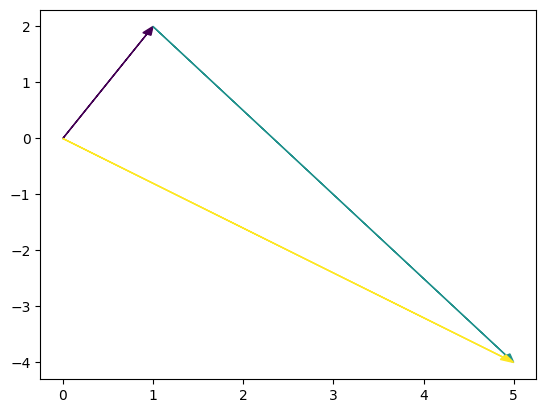

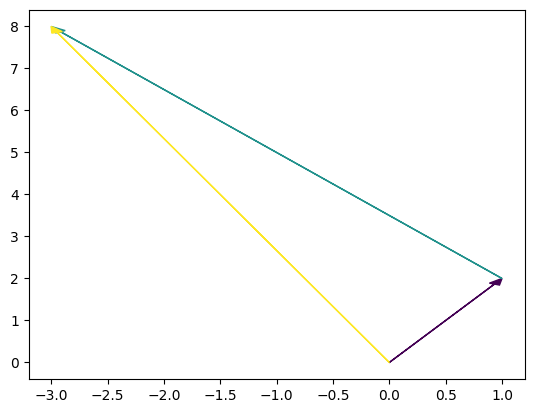

In [3]:
################################################################################
#
# plot_vectors - Plots vectors on a single chart.
#
# Args:
#      vectors: A list of lists or numpy arrays, where each sublist represents a vector (x, y).
#      labels: A list of strings, optional, to label each vector.
#      operation: An operation to use between the vectors
#  Returns:
#      The calculated vector
################################################################################
def plot_vectors(vectors, labels=None, operation="+"):
  plt.figure()

  vectors = np.array(vectors)  # Ensure vectors is a numpy array

  # Set up the color map
  # Get the number of vectors plus one for the result
  num_vectors = vectors.shape[0] + 1
  # Create a colormap object
  colormap="viridis"
  cmap = plt.cm.get_cmap(colormap)
  # Normalize color values based on number of vectors
  norm = plt.Normalize(vmin=0, vmax=num_vectors - 1)

  # Check if labels are provided
  if labels is None:
    labels = [f"Vector {i+1}" for i in range(len(vectors))]

  # Check operation (+ or -)
  if operation not in ["+", "-"]:
    raise ValueError("Invalid operation. Use '+' for addition or '-' for subtraction.")

  startX = 0
  startY = 0
  title = "Vectors "
  # Plot each vector with its label
  for i, vector in enumerate(vectors):
    title = title + labels[i] + ", "
    color = cmap(norm(i))  # Get color based on index and normalization
    if i > 0:
      resultLabel = resultLabel + operation + labels[i]
      if operation == "-":
        rvec = rvec - vector
        vector[0] = -vector[0]
        vector[1] = -vector[1]
      else:
        rvec = rvec + vector
    else:
      resultLabel = labels[i]
      rvec = vector
    plt.arrow(startX, startY, vector[0], vector[1], length_includes_head=True, head_width=0.1, label=labels[i], color=color)
    startX = startX + vector[0]
    startY = startY + vector[1]
  title = title + "and " + resultLabel
  # Plot the resultant vector
  color = cmap(norm(num_vectors))  # Get color for the result
  plt.arrow(0, 0, startX, startY, length_includes_head=True, head_width=0.1, label=resultLabel, color=color)
  return rvec
    

  # Set labels and title
  plt.xlabel("X-axis")
  plt.ylabel("Y-axis")
  plt.title(title)

  # Add legend if labels are provided
  if labels:
    plt.legend()

  # Show the plot
  plt.show()

# Test with two vectors
vectors = np.array([[1, 2], [4, -6]])
labels = ["V", "W"]
operation = "+"
rvec = plot_vectors(vectors, labels, operation)
print(f"For {vectors[0]} + {vectors[1]} the result is {rvec}.")
operation = "-"
rvec = plot_vectors(vectors, labels, operation)
print(f"For {vectors[0]} - {vectors[1]} the result is {rvec}.")



# Exercise 2.
Write an algorithm that computes the norm of a vector by translating the following equation into code.

$ \| V \| = \sqrt{\displaystyle\sum_{i=1}^{n} v_i^2} $
 
Confirm, using random vectors with different dimensionalities and orientations, that you get the same result as np.linalg.norm(). This exercise is designed to give you more experience with indexing NumPy arrays and translating formulas into code; in practice, it’s often easier to use np.linalg.norm().

In [4]:
################################################################################
#
# manual_norm - Calculates the Euclidean norm (L2 norm) of a vector.
#
# Args:
#      vector: A numpy array, list or tuple representing the vector (x, y, ..., z).
#
#  Returns:
#      The Euclidean norm of the vector.
################################################################################
def manual_norm(vector):
  vector = np.array(vector)  # Ensure vector is a numpy array
  sum_of_squares = 0
  for element in vector:
    sum_of_squares += element**2
  return sum_of_squares**0.5

# create 10 random vectors with dimension from 2 to 10 and values from 0 to 10
# show the vector and the norm from the manual calculation and the built in function
for i in range(1, 11):
    dimension = np.random.randint(2, 10)
    # Generate random numbers between 0 and 10
    vector = np.random.default_rng().uniform(0,10,dimension)
    print("")
    print(f"The vector has dimension {len(vector)} and the values are {np.array2string(vector, precision=2, floatmode='fixed')}")
    n1 = manual_norm(vector)
    n2 = np.linalg.norm(vector)
    print(f"The manual norm is {n1:,.2f} and the function norm is {n2:,.2f}. The difference is {n1-n2:,.2f}.")



The vector has dimension 3 and the values are [3.50 9.19 5.49]
The manual norm is 11.26 and the function norm is 11.26. The difference is 0.00.

The vector has dimension 3 and the values are [8.72 1.90 8.82]
The manual norm is 12.54 and the function norm is 12.54. The difference is 0.00.

The vector has dimension 7 and the values are [7.15 4.02 9.16 3.67 3.79 5.83 8.31]
The manual norm is 16.80 and the function norm is 16.80. The difference is 0.00.

The vector has dimension 7 and the values are [6.23 3.61 5.56 6.04 5.08 2.87 7.23]
The manual norm is 14.34 and the function norm is 14.34. The difference is 0.00.

The vector has dimension 2 and the values are [9.04 3.30]
The manual norm is 9.63 and the function norm is 9.63. The difference is 0.00.

The vector has dimension 4 and the values are [4.89 4.25 8.25 6.30]
The manual norm is 12.24 and the function norm is 12.24. The difference is 0.00.

The vector has dimension 9 and the values are [2.64 2.43 9.21 5.41 4.71 7.18 5.42 7.79 3.01

# Exercise 3.
Create a Python function that will take a vector as input and output a unit vector in the same direction. What happens when you input the zeros vector?

In [5]:
################################################################################
#
# cuv -  Calculates the unit vector in the same direction as the given vector.
#
# Args:
#      vector: A numpy array, list or tuple representing the vector (x, y, ..., z).
#
#  Returns:
#      The unit vector in the same direction as the input vector, or None if the input vector has a magnitude of 0.
################################################################################
def cuv(vector):
  
  vector = np.array(vector)  # Ensure vector is a numpy array

  norm = np.linalg.norm(vector)  # Calculate the vector's magnitude

  if norm == 0:
    # Handle zero vector case
    return None

  return vector / norm  # Normalize the vector to obtain the unit vector

# Example
vector = [3, 4]
unit_vector = cuv(vector)
print(f"For the vector {vector} the unit vector is {unit_vector}.")

vector = [0, 0]
unit_vector = cuv(vector)
print(f"For the vector {vector} the unit vector is {unit_vector}.")


For the vector [3, 4] the unit vector is [0.6 0.8].
For the vector [0, 0] the unit vector is None.


# Exercise 4.
You know how to create unit vectors; what if you want to create a vector of any arbitrary magnitude? Write a Python function that will take a vector and a desired magnitude as inputs and will return a vector in the same direction but with a magnitude corresponding to the second input.

In [6]:
################################################################################
#
# scale_vector -  Scales a vector to a desired magnitude while maintaining its direction.
#
# Args:
#      vector: A list or numpy array representing the vector.
#      magnitude: The desired magnitude for the scaled vector.
#
#  Returns:
#      A NumPy array representing the scaled vector.
################################################################################
def scale_vector(vector, magnitude):

  vector = np.array(vector)  # Ensure vector is a NumPy array

  # Handle zero vector case
  if np.linalg.norm(vector) == 0:
    return vector  # Return the zero vector itself

  # Calculate unit vector in the same direction
  unit_vector = vector / np.linalg.norm(vector)

  # Scale the unit vector by the desired magnitude
  scaled_vector = magnitude * unit_vector

  return scaled_vector

# Example usage
vector = [2, 3]
magnitude = 5
scaled_vector = scale_vector(vector, magnitude)
print(f"For vector {vector} and scale {magnitude} the scaled vector is {scaled_vector}.")

vector = [0, 0]
magnitude = 5
scaled_vector = scale_vector(vector, magnitude)
print(f"For vector {vector} and scale {magnitude} the scaled vector is {scaled_vector}.")


For vector [2, 3] and scale 5 the scaled vector is [2.77350098 4.16025147].
For vector [0, 0] and scale 5 the scaled vector is [0 0].


# Exercise 5.
Write a for loop to transpose a row vector into a column vector without using a built-in function or method such as np.transpose() or v.T. This exercise will help you create and index orientation-endowed vectors.

In [8]:
# Sample row vector
row_vector =  np.array([1, 2, 3])

# Create an empty list to store the column vector
column_vector_a = np.zeros((1,3),dtype=int)

# Iterate through the row vector elements
for i, element in enumerate(row_vector):
  column_vector_a[0,i] = element

column_vector_b = np.transpose(row_vector)

# Print the column vector
print(f"The row vector {row_vector} with shape {row_vector.shape} transposed to columns is {column_vector_a} with shape {column_vector_a.shape} using a for loop.")
print(f"The row vector {row_vector} with shape {row_vector.shape} transposed to columns is {column_vector_b} with shape {column_vector_b.shape} using the numpy transpose function.")

The row vector [1 2 3] with shape (3,) transposed to columns is [[1 2 3]] with shape (1, 3) using a for loop.
The row vector [1 2 3] with shape (3,) transposed to columns is [1 2 3] with shape (3,) using the numpy transpose function.


# Exercise 6.
Here is an interesting fact: you can compute the squared norm of a vector as the dot product of that vector with itself. Look back to the equation in Exercise 2 to convince yourself of this equivalence. Then confirm it using Python.

In [14]:
# create 10 random vectors with dimension from 2 to 10 and values from 0 to 10
# show the squared norm and dot product with itself are the same
for i in range(1, 11):
    dimension = np.random.randint(2, 10)
    # Generate random numbers between 0 and 10
    vector = np.random.default_rng().uniform(0,10,dimension)
    print("")
    print(f"The vector has dimension {len(vector)} and the values are {np.array2string(vector, precision=2, floatmode='fixed')}")
    squarednorm = np.linalg.norm(vector)**2
    dotproduct = np.dot(vector,vector)
    print(f"The squared norm is {squarednorm:,.2f} and the dot product is {dotproduct:,.2f}. The difference is {squarednorm-dotproduct:,.2f}.")


The vector has dimension 2 and the values are [4.92 5.41]
The squared norm is 53.44 and the dot product is 53.44. The difference is 0.00.

The vector has dimension 4 and the values are [2.72 0.05 7.53 5.77]
The squared norm is 97.35 and the dot product is 97.35. The difference is 0.00.

The vector has dimension 8 and the values are [4.85 2.68 4.95 4.92 3.34 5.14 6.00 8.90]
The squared norm is 232.31 and the dot product is 232.31. The difference is 0.00.

The vector has dimension 6 and the values are [7.03 1.92 5.61 7.30 3.38 4.65]
The squared norm is 170.90 and the dot product is 170.90. The difference is 0.00.

The vector has dimension 9 and the values are [0.50 8.22 8.78 2.34 3.41 2.17 4.94 9.37 7.54]
The squared norm is 335.71 and the dot product is 335.71. The difference is -0.00.

The vector has dimension 3 and the values are [1.15 4.84 2.00]
The squared norm is 28.72 and the dot product is 28.72. The difference is 0.00.

The vector has dimension 9 and the values are [8.31 9.12 4

# Exercise 7.
Write code to demonstrate that the dot product is commutative. Commutative means that 
a*b=b*a, which, for the vector dot product, means that a^T b=b^T a. After demonstrating this in code, use the following equation to understand why the dot product is commutative. 

$\delta = \displaystyle\sum_{i=1}^{n} a_i b_i $

In [16]:
# create 10 pairs of random vectors with dimension from 2 to 10 and values from 0 to 10
# show the dot product is commutitive
for i in range(1, 11):
    dimension = np.random.randint(2, 10)
    # Generate random numbers between 0 and 10
    vector1 = np.random.default_rng().uniform(0,10,dimension)
    vector2 = np.random.default_rng().uniform(0,10,dimension)
    print("")
    print(f"The vectors have dimension {len(vector1)} and the values are vector 1 {np.array2string(vector1, precision=2, floatmode='fixed')} and vector 2 {np.array2string(vector2, precision=2, floatmode='fixed')}")
    dotproduct1 = np.dot(vector1,vector2)
    dotproduct2 = np.dot(vector2,vector1)
    print(f"The dot product (vector 1, vector 2) is {dotproduct1:,.2f} and the dot product (vector 2, vector 1) is {dotproduct2:,.2f}. The difference is {dotproduct1-dotproduct2:,.2f}.")


The vectors have dimension 8 and the values are vector 1 [7.54 8.19 7.21 0.90 4.81 8.04 4.73 0.66] and vector 2 [5.75 6.77 2.01 3.71 4.03 7.32 7.31 1.93]
The dot product (vector 1, vector 2) is 230.79 and the dot product (vector 2, vector 1) is 230.79. The difference is 0.00.

The vectors have dimension 9 and the values are vector 1 [3.67 2.28 3.37 9.37 6.21 9.63 8.36 6.38 4.88] and vector 2 [0.72 4.44 3.13 8.78 1.81 8.03 4.27 1.74 6.73]
The dot product (vector 1, vector 2) is 273.76 and the dot product (vector 2, vector 1) is 273.76. The difference is 0.00.

The vectors have dimension 2 and the values are vector 1 [8.95 2.71] and vector 2 [6.35 6.54]
The dot product (vector 1, vector 2) is 74.52 and the dot product (vector 2, vector 1) is 74.52. The difference is 0.00.

The vectors have dimension 5 and the values are vector 1 [0.67 4.74 8.43 8.31 3.28] and vector 2 [3.03 6.69 2.98 7.73 1.30]
The dot product (vector 1, vector 2) is 127.27 and the dot product (vector 2, vector 1) is 12